#**FIFA-CONMEBOL classification machine learning project**
**Joaquín Rodríguez Villegas**

The following project aims to solve a multi class classification machine learning problem in the context of the FIFA-CONMEBOL qualifiers for the 2022 Qatar FIFA world cup championship. I started by collecting the data from the stats of each match played between the CONMEBOL participants to create a data set which registers 27 variables. The target variable is the result of the Home Team (Win (W), Draw (E), Loose (L)). I only took into account the variables which I can control and discarded the uncontrollable variables which can affect the results of my model. I also integrated the error metrics for a multi class classification problem and computed them to identify the accuracy of the model. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
conmebol = pd.read_excel('FIFA_eliminatories_dataset.xlsx')

In [3]:
conmebol.head(10)

,Date,Home,Away,Shots_home,Shots_away,Shots_on_target_home,Shots_on_target_away,Possession_home,Possession_away,Passes_home,Passes_away,Pass_accuracy_home,Pass_accuracy_away,Fouls_home,Fouls_away,Yellow_cards_home,Yellow_cards_away,Red_cards_home,Red_cards_away,Offsides_home,Offsides_away,Corners_home,Corners_away,goals_home,goals_away,Result_home,Result_away
0,2020-10-08,Paraguay,Peru,12,10,6,4,0.60,0.40,478,323,0.82,0.72,16,16,3,1,0,0,1,2,3,3,2,2,E,E
1,2020-10-08,Uruguay,Chile,9,6,2,3,0.52,0.48,478,457,0.75,0.79,13,20,3,2,0,0,0,2,5,3,2,1,W,L
2,2020-10-08,Argentina,Ecuador,8,4,2,0,0.59,0.41,547,400,0.82,0.80,14,19,2,1,0,0,0,0,6,1,1,0,W,L
3,2020-10-09,Colombia,Venezuela,8,11,6,3,0.58,0.42,567,410,0.91,0.86,21,13,0,3,0,0,0,2,2,5,3,0,W,L
4,2020-10-09,Brazil,Bolivia,20,3,9,1,0.70,0.30,659,298,0.88,0.69,13,8,1,4,0,0,3,1,8,2,5,0,W,L
5,2020-10-13,Bolivia,Argentina,10,16,3,3,0.57,0.43,453,335,0.82,0.76,15,11,4,4,0,0,1,0,3,7,1,2,L,W
6,2020-10-13,Ecuador,Uruguay,17,6,7,2,0.51,0.49,384,365,0.80,0.79,12,11,2,0,0,0,2,2,6,1,4,2,W,L
7,2020-10-13,Venezuela,Paraguay,10,8,2,3,0.33,0.67,274,565,0.77,0.88,17,14,3,3,0,0,0,2,6,6,0,1,L,W
8,2020-10-13,Peru,Brazil,7,13,6,9,0.34,0.66,262,507,0.75,0.88,22,15,2,0,2,0,3,3,1,2,2,4,L,W
9,2020-10-13,Chile,Colombia,6,10,3,4,0.46,0.54,349,398,0.79,0.79,16,18,5,2,0,0,2,1,1,4,2,2,E,E


In [4]:
conmebol.shape

(64, 27)

In [5]:
conmebol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  64 non-null     datetime64[ns]
 1   Home                  64 non-null     object        
 2   Away                  64 non-null     object        
 3   Shots_home            64 non-null     int64         
 4   Shots_away            64 non-null     int64         
 5   Shots_on_target_home  64 non-null     int64         
 6   Shots_on_target_away  64 non-null     int64         
 7   Possession_home       64 non-null     float64       
 8   Possession_away       64 non-null     float64       
 9   Passes_home           64 non-null     int64         
 10  Passes_away           64 non-null     int64         
 11  Pass_accuracy_home    64 non-null     float64       
 12  Pass_accuracy_away    64 non-null     float64       
 13  Fouls_home            

In [6]:
conmebol['Result_home'].unique()

array(['E', 'W', 'L'], dtype=object)

In [7]:
conmebol['Result_away'].unique()

array(['E', 'L', 'W'], dtype=object)

<Figure size 1800x1800 with 0 Axes>

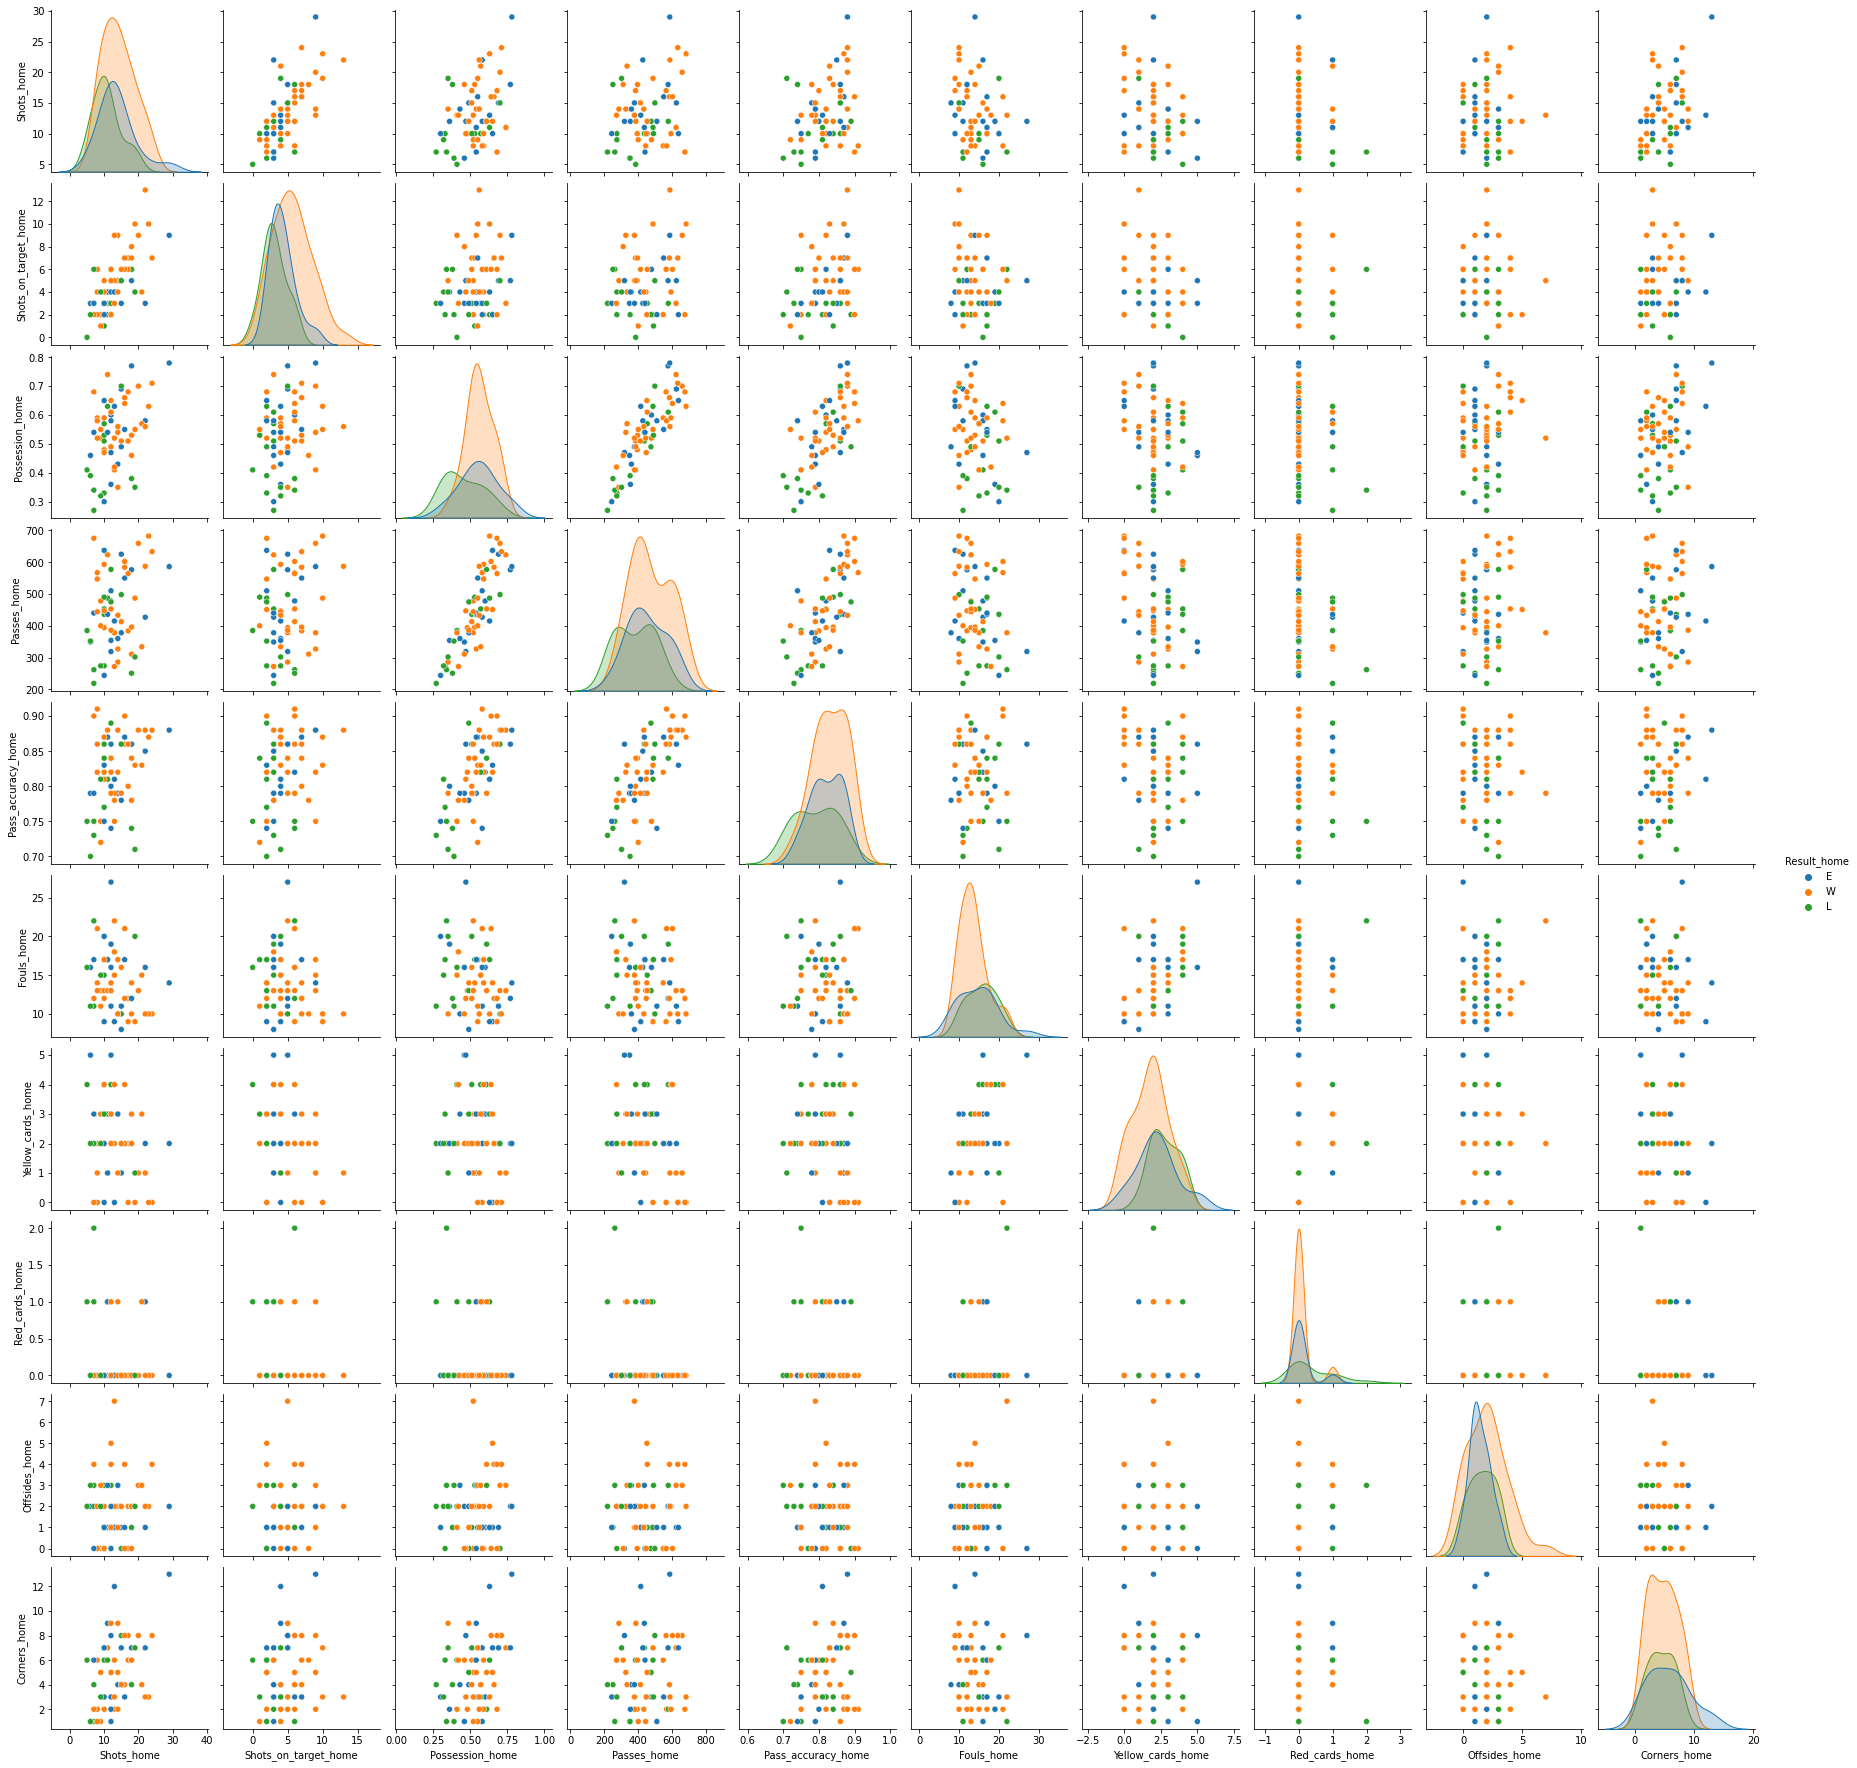

In [8]:
plt.figure(figsize=(25,25))
conmebol1 = pd.DataFrame(data = conmebol, columns = ['Shots_home','Shots_on_target_home','Possession_home','Passes_home','Pass_accuracy_home','Fouls_home','Yellow_cards_home','Red_cards_home','Offsides_home','Corners_home','Result_home'])
sns.pairplot(conmebol1, hue = 'Result_home')

<Figure size 1800x1800 with 0 Axes>

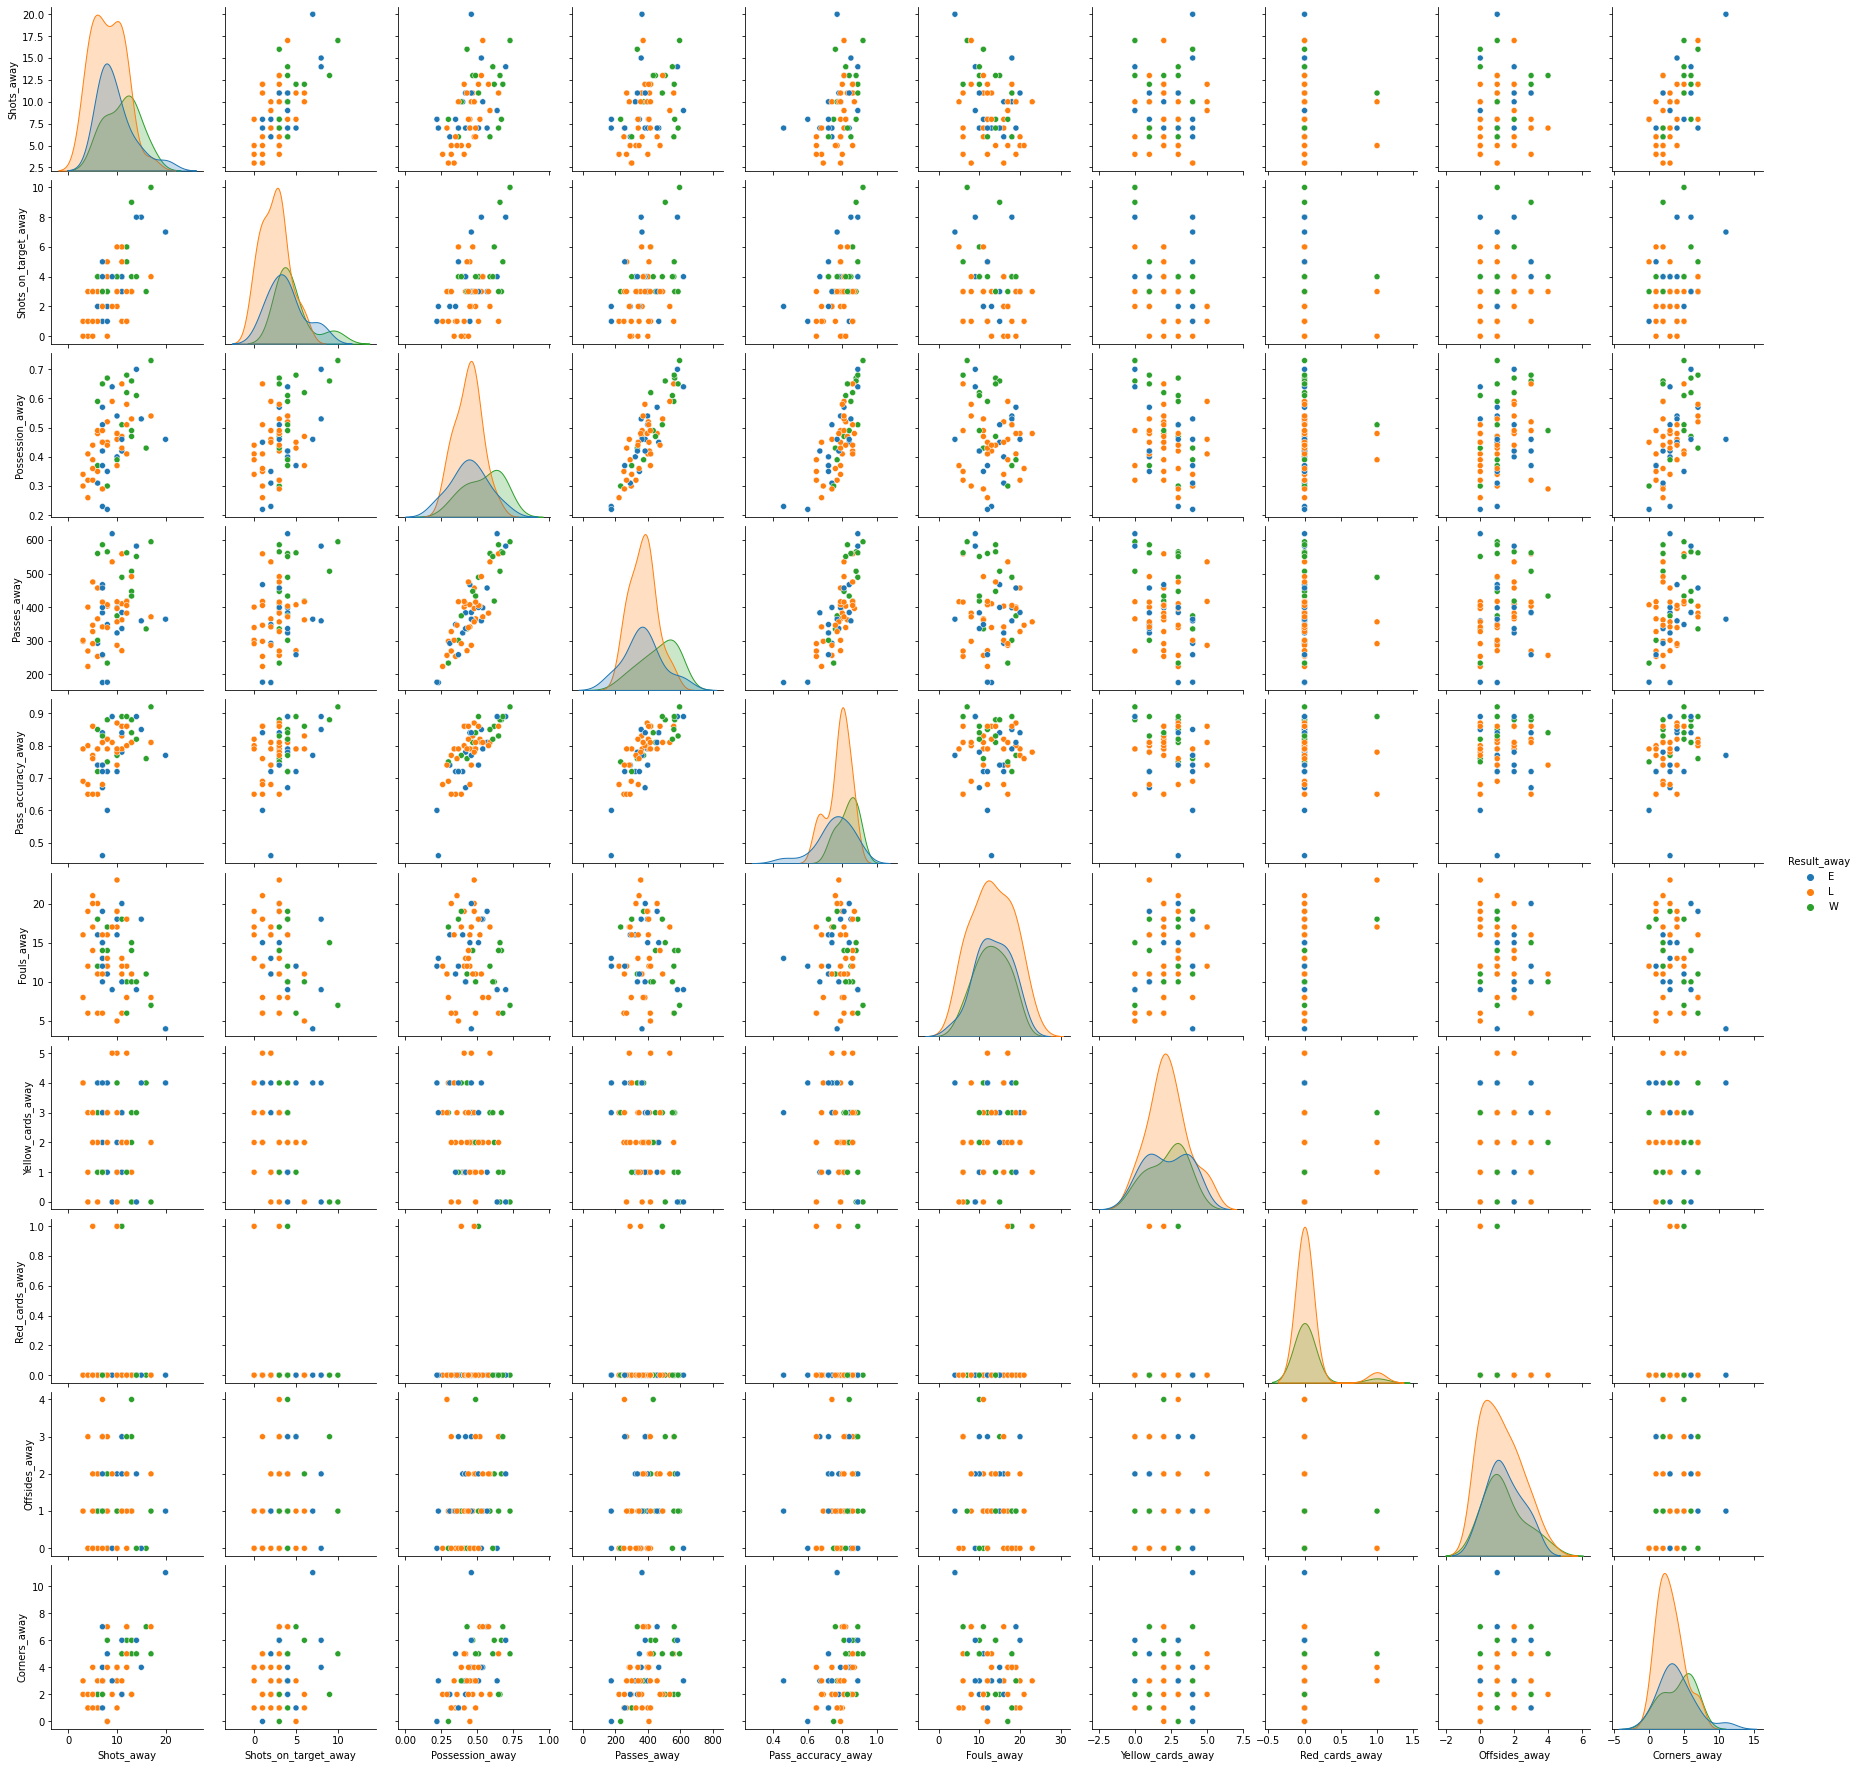

In [9]:
plt.figure(figsize=(25,25))
conmebol2 = pd.DataFrame(data = conmebol, columns = ['Shots_away','Shots_on_target_away','Possession_away','Passes_away','Pass_accuracy_away','Fouls_away','Yellow_cards_away','Red_cards_away','Offsides_away','Corners_away','Result_away'])
sns.pairplot(conmebol2, hue = 'Result_away')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Frecuencia')

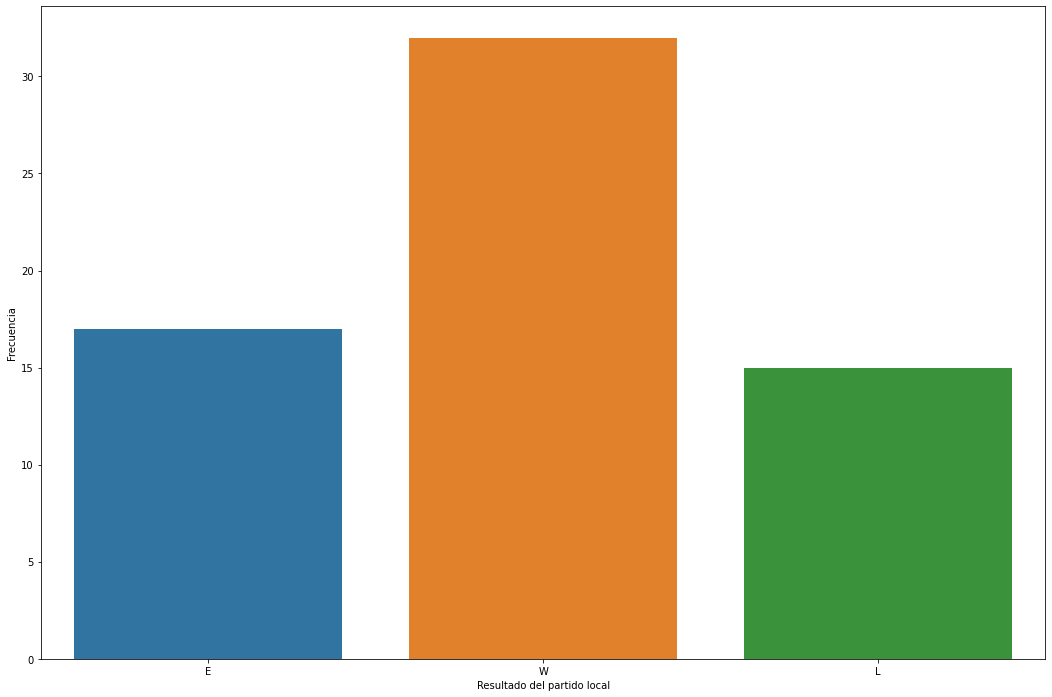

In [10]:
plt.figure(figsize=(18,12))
sns.countplot(conmebol['Result_home'])
plt.xlabel('Resultado del partido local')
plt.ylabel('Frecuencia')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
x = conmebol.iloc[:,3:23]
x

,Shots_home,Shots_away,Shots_on_target_home,Shots_on_target_away,Possession_home,Possession_away,Passes_home,Passes_away,Pass_accuracy_home,Pass_accuracy_away,Fouls_home,Fouls_away,Yellow_cards_home,Yellow_cards_away,Red_cards_home,Red_cards_away,Offsides_home,Offsides_away,Corners_home,Corners_away
0,12,10,6,4,0.60,0.40,478,323,0.82,0.72,16,16,3,1,0,0,1,2,3,3
1,9,6,2,3,0.52,0.48,478,457,0.75,0.79,13,20,3,2,0,0,0,2,5,3
2,8,4,2,0,0.59,0.41,547,400,0.82,0.80,14,19,2,1,0,0,0,0,6,1
3,8,11,6,3,0.58,0.42,567,410,0.91,0.86,21,13,0,3,0,0,0,2,2,5
4,20,3,9,1,0.70,0.30,659,298,0.88,0.69,13,8,1,4,0,0,3,1,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,14,8,4,0,0.56,0.44,433,339,0.88,0.82,10,13,1,3,0,0,1,1,2,4
60,6,14,2,4,0.39,0.61,352,551,0.70,0.82,11,10,2,3,0,0,3,0,1,5
61,16,5,6,1,0.64,0.36,602,346,0.90,0.76,21,21,4,3,0,0,0,1,8,2
62,15,7,6,3,0.51,0.49,413,415,0.79,0.81,16,6,2,1,0,0,2,3,4,3


In [13]:
y = conmebol.iloc[:,25:26]
y

,Result_home
0,E
1,W
2,W
3,W
4,W
...,...
59,W
60,L
61,W
62,W


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20221121)
x_train, y_train

(    Shots_home  Shots_away  ...  Corners_home  Corners_away
 42          24           7  ...             8             2
 7           10           8  ...             6             6
 31          12           6  ...             5             1
 13          10           8  ...             2             7
 23          12          11  ...             5             5
 12          11           6  ...             6             1
 63          19           7  ...             7             2
 57          12          12  ...             9             4
 21          12           7  ...             1             3
 38          13          10  ...             3             3
 55          13           7  ...            12             1
 54          18          17  ...             6             7
 58          22           5  ...             3             2
 51          12           9  ...             2             3
 15          14          10  ...             5             4
 34          12         

In [15]:
x_test, y_test

(    Shots_home  Shots_away  ...  Corners_home  Corners_away
 35          11          11  ...             9             6
 45          15           7  ...             4             3
 60           6          14  ...             1             5
 8            7          13  ...             1             2
 17          18           7  ...             7             3
 41           8          10  ...             1             4
 47          17           4  ...             8             1
 5           10          16  ...             3             7
 49          21          11  ...             4             3
 1            9           6  ...             5             3
 33          10           8  ...             7             5
 10          18          12  ...             4             6
 61          16           5  ...             8             2
 
 [13 rows x 20 columns],    Result_home
 35           E
 45           E
 60           L
 8            L
 17           E
 41           W
 47     

In [16]:
scaler = StandardScaler()
x_train_n = scaler.fit_transform(x_train)
x_test_n = scaler.fit_transform(x_test)

In [17]:
x_train_n, x_test_n

(array([[ 2.15883148, -0.58876787,  0.80434783, ...,  2.4687958 ,
          1.12242247, -0.63576888],
        [-0.68509043, -0.31328933, -1.04347826, ...,  0.65716147,
          0.38379607,  1.14090031],
        [-0.27881587, -0.86424641, -1.04347826, ..., -1.15447285,
          0.01448287, -1.07993617],
        ...,
        [ 1.75255692,  0.51314631, -0.67391304, ...,  0.65716147,
          0.75310927, -0.63576888],
        [-1.29450227,  2.16601758, -0.67391304, ..., -0.24865569,
         -0.35483033,  0.69673301],
        [-0.68509043,  1.33958194, -0.67391304, ...,  0.65716147,
         -0.72414353,  1.14090031]]),
 array([[-0.37439228,  0.41245912, -0.04987547, -0.31046021, -0.02560843,
          0.02560843, -0.06288817,  0.10813493,  0.99179193,  0.69687815,
          0.80983119,  1.30715169, -0.72760688,  0.64820372,  1.14300114,
          0.        ,  1.2080809 ,  1.42133811,  1.5543919 ,  1.23263127],
        [ 0.47205983, -0.71637637, -0.69825654, -0.31046021, -0.44174534,
  

In [18]:
DTC = DecisionTreeClassifier(random_state = 202)
RFC = RandomForestClassifier(n_estimators = 11, random_state = 202)
KNC = KNeighborsClassifier(n_neighbors = 5)
VC = SVC(kernel = 'rbf')
GBC = GradientBoostingClassifier(n_estimators = 8, random_state = 202)

In [19]:
DTC.fit(x_train_n,y_train)
RFC.fit(x_train_n,y_train)
VC.fit(x_train_n,y_train)
GBC.fit(x_train_n,y_train)
KNC.fit(x_train_n,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [20]:
y_predict1 = DTC.predict(x_test_n)
y_predict2 = RFC.predict(x_test_n)
y_predict3 = VC.predict(x_test_n)
y_predict4 = GBC.predict(x_test_n)
y_predict5 = KNC.predict(x_test_n)

In [21]:
y_predict1, y_predict2, y_predict3, y_predict4, y_predict5

(array(['L', 'W', 'E', 'W', 'W', 'W', 'L', 'W', 'E', 'W', 'W', 'W', 'E'],
       dtype=object),
 array(['W', 'W', 'L', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'W', 'L', 'W'],
       dtype=object),
 array(['W', 'W', 'W', 'E', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
       dtype=object),
 array(['W', 'W', 'L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
       dtype=object),
 array(['L', 'W', 'E', 'L', 'E', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'E'],
       dtype=object))

[Text(188.32500000000002, 201.90857142857143, 'X[3] <= 0.125\ngini = 0.608\nsamples = 51\nvalue = [13, 11, 27]'),
 Text(92.07000000000001, 170.84571428571428, 'X[7] <= 1.548\ngini = 0.427\nsamples = 30\nvalue = [4, 4, 22]'),
 Text(75.33000000000001, 139.78285714285715, 'X[19] <= -1.302\ngini = 0.357\nsamples = 28\nvalue = [4, 2, 22]'),
 Text(33.480000000000004, 108.72, 'X[5] <= -1.751\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(16.740000000000002, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(50.220000000000006, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(117.18, 108.72, 'X[19] <= 0.919\ngini = 0.269\nsamples = 26\nvalue = [3, 1, 22]'),
 Text(83.70000000000002, 77.65714285714284, 'X[0] <= 0.229\ngini = 0.159\nsamples = 23\nvalue = [2, 0, 21]'),
 Text(66.96000000000001, 46.59428571428572, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 15]'),
 Text(100.44000000000001, 46.59428571428572, 'X[16] <= -0.211\ngini = 0.375\nsamples = 8\

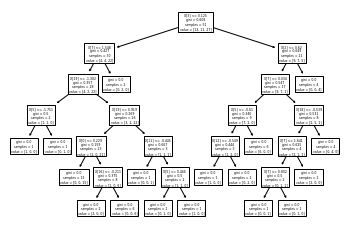

In [22]:
tree.plot_tree(DTC)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Confusion matrix, without normalization
[[0 1 3]
 [1 0 3]
 [2 1 2]]
Normalized confusion matrix
[[0.   0.25 0.75]
 [0.25 0.   0.75]
 [0.4  0.2  0.4 ]]


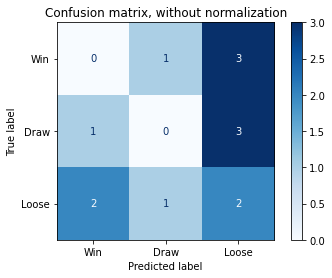

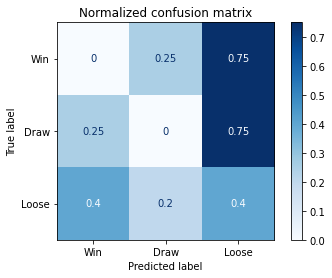

In [23]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, matthews_corrcoef, balanced_accuracy_score, roc_curve, auc, roc_auc_score
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(DTC, x_test_n, y_test,
                                 display_labels=['Win','Draw','Loose'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [24]:
print('Accuracy = '+str(accuracy_score(y_test, y_predict1)))
print('Balanced accuracy = '+str(balanced_accuracy_score(y_test, y_predict1)))
print('Matthews correlation coefficient = '+str(matthews_corrcoef(y_test, y_predict1)))

Accuracy = 0.15384615384615385
Balanced accuracy = 0.13333333333333333
Matthews correlation coefficient = -0.3349469226516178


Confusion matrix, without normalization
[[0 0 4]
 [0 4 0]
 [0 0 5]]
Normalized confusion matrix
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



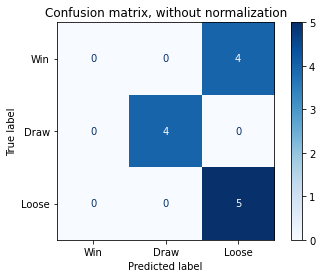

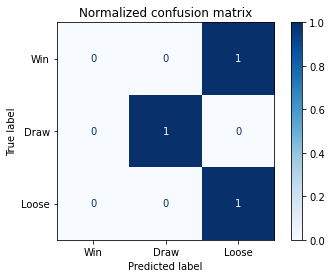

In [25]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(RFC, x_test_n, y_test,
                                 display_labels=['Win','Draw','Loose'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [26]:
print('Accuracy = '+str(accuracy_score(y_test, y_predict2)))
print('Balanced accuracy = '+str(balanced_accuracy_score(y_test, y_predict2)))
print('Matthews correlation coefficient = '+str(matthews_corrcoef(y_test, y_predict2)))

Accuracy = 0.6923076923076923
Balanced accuracy = 0.6666666666666666
Matthews correlation coefficient = 0.6236095644623235


Confusion matrix, without normalization
[[0 0 4]
 [1 0 3]
 [0 0 5]]
Normalized confusion matrix
[[0.   0.   1.  ]
 [0.25 0.   0.75]
 [0.   0.   1.  ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



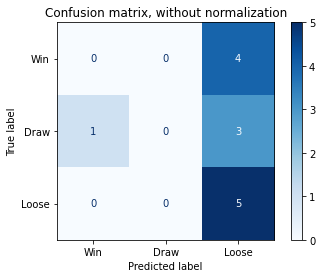

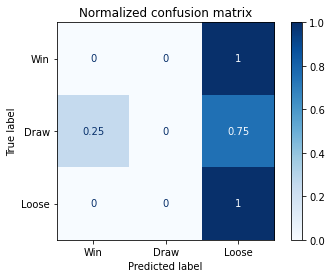

In [27]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(VC, x_test_n, y_test,
                                 display_labels=['Win','Draw','Loose'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [28]:
print('Accuracy = '+str(accuracy_score(y_test, y_predict3)))
print('Balanced accuracy = '+str(balanced_accuracy_score(y_test, y_predict3)))
print('Matthews correlation coefficient = '+str(matthews_corrcoef(y_test, y_predict3)))

Accuracy = 0.38461538461538464
Balanced accuracy = 0.3333333333333333
Matthews correlation coefficient = 0.01928791874526149


Confusion matrix, without normalization
[[0 0 4]
 [0 1 3]
 [0 0 5]]
Normalized confusion matrix
[[0.   0.   1.  ]
 [0.   0.25 0.75]
 [0.   0.   1.  ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



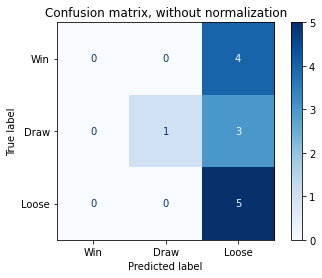

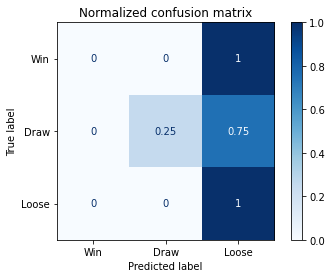

In [29]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(GBC, x_test_n, y_test,
                                 display_labels=['Win','Draw','Loose'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [30]:
print('Accuracy = '+str(accuracy_score(y_test, y_predict4)))
print('Balanced accuracy = '+str(balanced_accuracy_score(y_test, y_predict4)))
print('Matthews correlation coefficient = '+str(matthews_corrcoef(y_test, y_predict4)))

Accuracy = 0.46153846153846156
Balanced accuracy = 0.4166666666666667
Matthews correlation coefficient = 0.2700308624336608


Confusion matrix, without normalization
[[1 1 2]
 [1 2 1]
 [1 0 4]]
Normalized confusion matrix
[[0.25 0.25 0.5 ]
 [0.25 0.5  0.25]
 [0.2  0.   0.8 ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



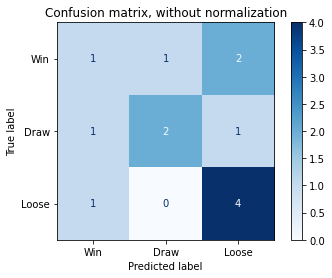

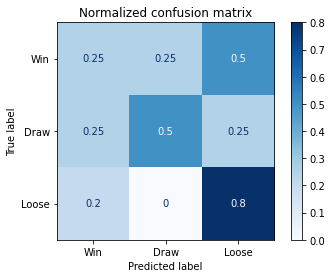

In [31]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(KNC, x_test_n, y_test,
                                 display_labels=['Win','Draw','Loose'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [32]:
print('Accuracy = '+str(accuracy_score(y_test, y_predict5)))
print('Balanced accuracy = '+str(balanced_accuracy_score(y_test, y_predict5)))
print('Matthews correlation coefficient = '+str(matthews_corrcoef(y_test, y_predict5)))

Accuracy = 0.5384615384615384
Balanced accuracy = 0.5166666666666667
Matthews correlation coefficient = 0.2993924754260479


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed

Text(0, 0.5, 'Accuracy')

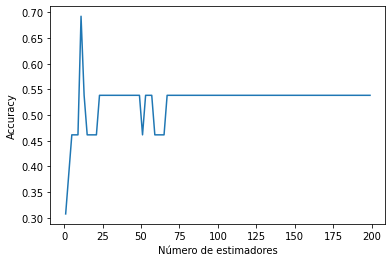

In [33]:
#Random Forest Classifier
Accuracy = []
Balanced_accuracy = []
for i in range(1,200,2):
  RFi = RandomForestClassifier(n_estimators = i, random_state = 202)
  RFi.fit(x_train_n,y_train)
  yRF_predict = RFi.predict(x_test_n)
  Accuracy.append(accuracy_score(y_test, yRF_predict))
  Balanced_accuracy.append(balanced_accuracy_score(y_test, yRF_predict))
Accuracy = np.array(Accuracy)
Balanced_accuracy = np.array(Balanced_accuracy)

plt.plot(np.arange(1,200,2),Accuracy)
plt.xlabel('Número de estimadores')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Balanced accuracy')

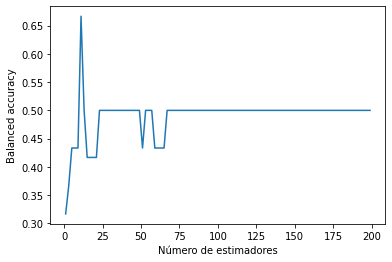

In [34]:
plt.plot(np.arange(1,200,2),Balanced_accuracy)
plt.xlabel('Número de estimadores')
plt.ylabel('Balanced accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/n

Text(0, 0.5, 'Accuracy')

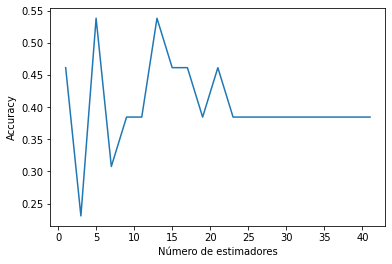

In [35]:
#K Nearest Neighbors Classifier
Accuracy = []
Balanced_accuracy = []
for i in range(1,43,2):
  KNNi = KNeighborsClassifier(n_neighbors = i)
  KNNi.fit(x_train_n,y_train)
  yKNN_predict = KNNi.predict(x_test_n)
  Accuracy.append(accuracy_score(y_test, yKNN_predict))
  Balanced_accuracy.append(balanced_accuracy_score(y_test, yKNN_predict))
Accuracy = np.array(Accuracy)
Balanced_accuracy = np.array(Balanced_accuracy)

plt.plot(np.arange(1,43,2),Accuracy)
plt.xlabel('Número de estimadores')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Balanced accuracy')

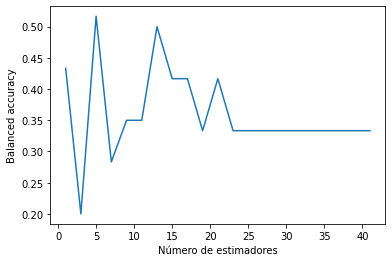

In [36]:
plt.plot(np.arange(1,43,2),Balanced_accuracy)
plt.xlabel('Número de estimadores')
plt.ylabel('Balanced accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A co

Text(0, 0.5, 'Accuracy')

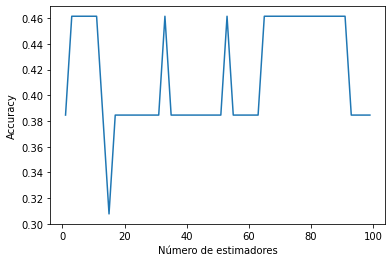

In [37]:
#Gradient Booster Classifier
Accuracy = []
Balanced_accuracy = []
for i in range(1,100,2):
  GBi = GradientBoostingClassifier(n_estimators = i, random_state = 202)
  GBi.fit(x_train_n,y_train)
  yGB_predict = GBi.predict(x_test_n)
  Accuracy.append(accuracy_score(y_test, yGB_predict))
  Balanced_accuracy.append(balanced_accuracy_score(y_test, yGB_predict))
Accuracy = np.array(Accuracy)
Balanced_accuracy = np.array(Balanced_accuracy)

plt.plot(np.arange(1,100,2),Accuracy)
plt.xlabel('Número de estimadores')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Balanced accuracy')

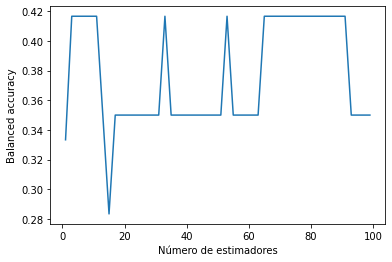

In [38]:
plt.plot(np.arange(1,100,2),Balanced_accuracy)
plt.xlabel('Número de estimadores')
plt.ylabel('Balanced accuracy')

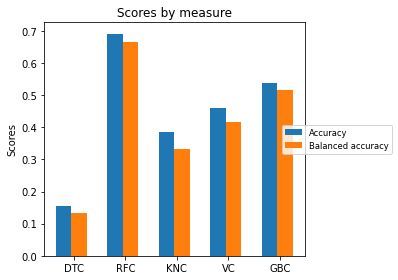

In [39]:
labels = ['DTC', 'RFC', 'KNC', 'VC', 'GBC']
measures = ['Accuracy','Balanced accuracy']
Performance = []
Performance.append([accuracy_score(y_test, y_predict1), accuracy_score(y_test, y_predict2), accuracy_score(y_test, y_predict3), accuracy_score(y_test, y_predict4), accuracy_score(y_test, y_predict5)])
Performance.append([balanced_accuracy_score(y_test, y_predict1), balanced_accuracy_score(y_test, y_predict2), balanced_accuracy_score(y_test, y_predict3), balanced_accuracy_score(y_test, y_predict4), balanced_accuracy_score(y_test, y_predict5)])

x = np.arange(len(labels))*2 
width = 0.6  

fig, ax = plt.subplots()
for i in range(len(measures)):
    ax.bar(x + i*width+0.3 -0.7, Performance[i],width, label=measures[i])
    
ax.set_ylabel('Scores')
ax.set_title('Scores by measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1,loc='center right', fontsize='small',bbox_to_anchor=(1.35, 0.5))
fig.tight_layout()
plt.show()

In [40]:
validation = pd.read_excel('Validation_dataset.xlsx')
validation

,Date,Home,Away,Shots_home,Shots_away,Shots_on_target_home,Shots_on_target_away,Possession_home,Possession_away,Passes_home,Passes_away,Pass_accuracy_home,Pass_accuracy_away,Fouls_home,Fouls_away,Yellow_cards_home,Yellow_cards_away,Red_cards_home,Red_cards_away,Offsides_home,Offsides_away,Corners_home,Corners_away
0,2021-11-16,Bolivia,Uruguay,11,17,4,4,0.55,0.45,403,339,0.78,0.72,14,7,1,1,1,0,0,1,6,3
1,2021-11-16,Venezuela,Peru,17,12,6,5,0.60,0.40,453,312,0.87,0.77,18,14,2,3,0,0,1,0,9,5
2,2021-11-16,Colombia,Paraguay,14,8,2,0,0.65,0.35,473,250,0.83,0.66,14,15,3,1,0,1,3,2,6,4
3,2021-11-16,Argentina,Brazil,9,9,3,2,0.56,0.44,495,399,0.85,0.81,21,21,4,3,0,0,1,0,7,0
4,2021-11-16,Chile,Ecuador,13,15,1,6,0.54,0.46,446,402,0.81,0.79,11,15,1,2,1,0,1,1,2,1


In [41]:
x_predict = validation.iloc[:,3:23]
x_predict

,Shots_home,Shots_away,Shots_on_target_home,Shots_on_target_away,Possession_home,Possession_away,Passes_home,Passes_away,Pass_accuracy_home,Pass_accuracy_away,Fouls_home,Fouls_away,Yellow_cards_home,Yellow_cards_away,Red_cards_home,Red_cards_away,Offsides_home,Offsides_away,Corners_home,Corners_away
0,11,17,4,4,0.55,0.45,403,339,0.78,0.72,14,7,1,1,1,0,0,1,6,3
1,17,12,6,5,0.60,0.40,453,312,0.87,0.77,18,14,2,3,0,0,1,0,9,5
2,14,8,2,0,0.65,0.35,473,250,0.83,0.66,14,15,3,1,0,1,3,2,6,4
3,9,9,3,2,0.56,0.44,495,399,0.85,0.81,21,21,4,3,0,0,1,0,7,0
4,13,15,1,6,0.54,0.46,446,402,0.81,0.79,11,15,1,2,1,0,1,1,2,1


In [42]:
x_predict_norm = scaler.fit_transform(x_predict)
x_predict_norm

array([[-0.6634888 ,  1.39970842,  0.46499055,  0.27854301, -0.7407972 ,
         0.7407972 , -1.6620227 , -0.02458851, -1.53644256, -0.55517491,
        -0.45732956, -1.66134904, -1.02899151, -1.11803399,  1.22474487,
        -0.5       , -1.22474487,  0.26726124,  0.        ,  0.21566555],
       [ 1.54814054, -0.05832118,  1.62746694,  0.74278135,  0.4938648 ,
        -0.4938648 , -0.03258868, -0.49879553,  1.34438724,  0.37011661,
         0.68599434, -0.08980265, -0.17149859,  1.11803399, -0.81649658,
        -0.5       , -0.20412415, -1.06904497,  1.31558703,  1.29399328],
       [ 0.44232587, -1.22474487, -0.69748583, -1.57841037,  1.72852679,
        -1.72852679,  0.61918493, -1.58771535,  0.06401844, -1.66552472,
        -0.45732956,  0.13470398,  0.68599434, -1.11803399, -0.81649658,
         2.        ,  1.83711731,  1.60356745,  0.        ,  0.75482941],
       [-1.40069858, -0.93313895, -0.11624764, -0.64993368, -0.4938648 ,
         0.4938648 ,  1.3361359 ,  1.02920486,  

In [43]:
RFC.predict(x_predict_norm), DTC.predict(x_predict_norm), GBC.predict(x_predict_norm), VC.predict(x_predict_norm), KNC.predict(x_predict_norm)

(array(['E', 'W', 'W', 'W', 'E'], dtype=object),
 array(['E', 'W', 'W', 'L', 'L'], dtype=object),
 array(['W', 'W', 'W', 'W', 'L'], dtype=object),
 array(['W', 'W', 'W', 'W', 'W'], dtype=object),
 array(['W', 'W', 'W', 'W', 'W'], dtype=object))